In [1]:
import numpy as np
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.geometry_utils import transform_matrix
from pyquaternion import Quaternion

from scipy.spatial.transform import Rotation

from scripts.utils import SensorParameters
from scripts.plot_utils import plot_camera_pose
from pyquaternion import Quaternion

from scripts.utils import NovelCamera, get_novel_cam_params

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Plot Camera Pose

In [2]:
nusc = NuScenes(version='v1.0-mini', dataroot='data/sets/nuscenes', verbose=False)
sensors = ['LIDAR_TOP', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_RIGHT', 'CAM_BACK', 'CAM_BACK_LEFT', 'CAM_FRONT_LEFT']

scene_idx = 1
scene = nusc.scene[scene_idx]
first_sample_token = scene['first_sample_token']
scene_sample = nusc.get('sample', first_sample_token)
sensor_params = SensorParameters(nusc, scene_sample, sensors)

tvs, transform_matrices = sensor_params.global_pose(sensor_params.current_sample, inverse=True)

q = Quaternion(tvs[0][:-3])

# plot_camera_pose(transform_matrices, sensors)
fig = plot_camera_pose(transform_matrices, sensors)


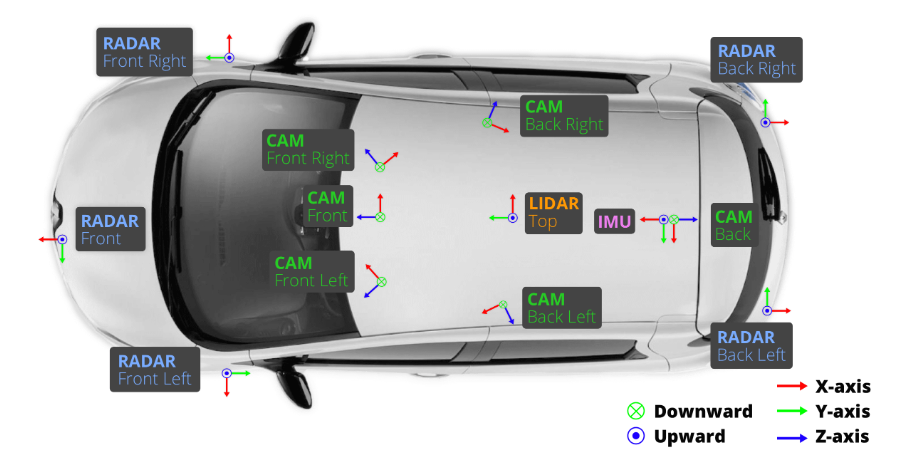

image source: [nuscenes](https://www.nuscenes.org/nuscenes#tutorials)

In [3]:
sensors = ['LIDAR_TOP', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_RIGHT', 'CAM_BACK', 'CAM_BACK_LEFT', 'CAM_FRONT_LEFT']

fig = plot_camera_pose(transform_matrices, sensors, only_plot_obj=True)

novel_cameras = get_novel_cam_params(sensor_params=sensor_params)
scene_sample = nusc.get('sample', scene_sample['next'])
_, transform_matrices = sensor_params.global_pose(scene_sample, inverse=True)

fig = plot_camera_pose(transform_matrices, sensors, fig=fig, only_plot_obj=True)

novel_cameras = get_novel_cam_params(sensor_params=sensor_params)
scene_sample = nusc.get('sample', scene_sample['next'])
_, transform_matrices = sensor_params.global_pose(scene_sample, inverse=True)

fig = plot_camera_pose(transform_matrices, sensors, fig=fig, only_plot_obj=False)

